In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [494]:
df_train=pd.read_excel('training_set.xlsx') 
df_test=pd.read_excel('testing_set.xlsx')

In [493]:
df_train.head(50)

,VERATO_IDN_NUM,GENDER_F,DECEMBER,COVID,VIRTUALVISIT,FAM_PRACT_LT_12MO,FAM_PRACT_LT_24MO,FAM_PRACT_LT_60MO,FAM_PRACT_LAST,INTERN_MED_LT_12MO,...,t_N03270_c,t_N07100_c,t_N11560_c,t_N03220_c,t_A07300_c,t_PREP_c,AGE_SQ,THR_hosp_closer,CHILD,SENIOR
0,5d492d43dfb79c726cdab1a8,1,1,0,0,0,0,0,72,0,...,0.059477,0.341176,0.012418,0.018954,0.357778,0.596078,5625,0,0,1
1,5d492fe1e709797251fcb6dc,1,0,1,0,9,15,24,2,0,...,0.043350,0.354886,0.008082,0.044820,0.071345,0.493755,1936,0,0,0
2,5d49131c27e1a27253f13f71,1,0,0,0,0,0,0,72,0,...,0.037409,0.333333,0.007817,0.036851,0.085371,0.451703,3249,0,0,0
3,5d490eb627e1a27253f0feb8,0,0,1,0,2,10,12,10,0,...,0.016240,0.399750,0.013429,0.042786,0.036696,0.392255,1296,1,0,0
4,5d4937e296932872619e0230,1,0,0,0,13,27,69,4,0,...,0.059477,0.341176,0.012418,0.018954,0.357778,0.596078,5476,0,0,1


In [8]:
df_test.head(50)

,VERATO_IDN_NUM,GENDER_F,DECEMBER,COVID,VIRTUALVISIT,FAM_PRACT_LT_12MO,FAM_PRACT_LT_24MO,FAM_PRACT_LT_60MO,FAM_PRACT_LAST,INTERN_MED_LT_12MO,...,t_N03270_c,t_N07100_c,t_N11560_c,t_N03220_c,t_A07300_c,t_PREP_c,AGE_SQ,THR_hosp_closer,CHILD,SENIOR
0,5d490401e709797251fac37f,0,0,0,0,0,0,5,42,0,...,0.051932,0.376812,0.009662,0.041063,0.074517,0.508454,3364,1,0,0
1,5d48f827e709797251fa120f,1,0,0,0,11,11,11,2,0,...,0.011242,0.392437,0.011753,0.034747,0.007205,0.422586,7569,0,0,1
2,5d495717e709797251fe04bf,1,0,0,0,0,0,0,72,2,...,0.018773,0.338548,0.010325,0.040363,0.018335,0.437422,4489,1,0,1
3,5dfdea6b98a2a923b1788469,1,0,0,0,5,5,5,2,0,...,0.024586,0.356247,0.011039,0.046162,0.015956,0.410938,4900,0,0,1
4,5d495a0be709797251fe1ba9,0,0,0,0,1,2,2,2,0,...,0.033576,0.333520,0.012311,0.038053,0.064969,0.423055,4761,0,0,1
5,5d496a799fea08737f36aaf7,1,0,0,1,10,19,33,2,0,...,0.010705,0.367758,0.015743,0.038413,0.036146,0.469773,2304,0,0,0
6,5d495f6608614a73c305ae13,1,0,0,0,37,49,81,2,0,...,0.005629,0.348030,0.010319,0.032833,0.001126,0.514071,3969,0,0,0
7,5d491b2527e1a27253f1a679,1,0,1,0,0,0,3,55,0,...,0.019727,0.301973,0.012140,0.025038,0.016768,0.455994,4225,1,0,1
8,5d48ff699af2447252645cc1,1,0,0,0,3,3,3,3,0,...,0.012856,0.325573,0.018416,0.022933,0.007019,0.499305,3364,0,0,0
9,5d4953406ea7007246d8d304,1,0,0,0,2,4,18,4,0,...,0.024169,0.287009,0.009063,0.030211,0.003323,0.531722,5329,1,0,1


In [9]:
df = pd.concat([df_train,df_test])

In [10]:
df

,VERATO_IDN_NUM,GENDER_F,DECEMBER,COVID,VIRTUALVISIT,FAM_PRACT_LT_12MO,FAM_PRACT_LT_24MO,FAM_PRACT_LT_60MO,FAM_PRACT_LAST,INTERN_MED_LT_12MO,...,t_N03270_c,t_N07100_c,t_N11560_c,t_N03220_c,t_A07300_c,t_PREP_c,AGE_SQ,THR_hosp_closer,CHILD,SENIOR
0,5d492d43dfb79c726cdab1a8,1,1,0,0,0,0,0,72,0,...,0.059477,0.341176,0.012418,0.018954,0.357778,0.596078,5625,0,0,1
1,5d492fe1e709797251fcb6dc,1,0,1,0,9,15,24,2,0,...,0.043350,0.354886,0.008082,0.044820,0.071345,0.493755,1936,0,0,0
2,5d49131c27e1a27253f13f71,1,0,0,0,0,0,0,72,0,...,0.037409,0.333333,0.007817,0.036851,0.085371,0.451703,3249,0,0,0
3,5d490eb627e1a27253f0feb8,0,0,1,0,2,10,12,10,0,...,0.016240,0.399750,0.013429,0.042786,0.036696,0.392255,1296,1,0,0
4,5d4937e296932872619e0230,1,0,0,0,13,27,69,4,0,...,0.059477,0.341176,0.012418,0.018954,0.357778,0.596078,5476,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634,5d495c349fea08737f36391b,1,1,0,1,14,29,37,4,0,...,0.007838,0.318489,0.013894,0.022444,0.000748,0.502672,2209,0,0,0
9635,5d4935067f0a5872581bf358,0,1,0,1,19,32,32,2,0,...,0.015131,0.310867,0.015131,0.020633,0.003301,0.434663,4761,1,0,1
9636,5d494f49e709797251fdc287,0,0,0,0,0,0,0,72,0,...,0.037725,0.343114,0.011377,0.054491,0.043533,0.450898,4356,0,0,1
9637,5d490f277f0a5872581a821d,1,0,1,1,7,10,10,5,0,...,0.015914,0.304415,0.016427,0.022074,0.009446,0.422485,841,0,0,0


In [11]:
# Dividing the dataset into X and Y 

X=df.drop(['VERATO_IDN_NUM','VIRTUALVISIT'],axis=1)

y=df['VIRTUALVISIT']

In [12]:
X

,GENDER_F,DECEMBER,COVID,FAM_PRACT_LT_12MO,FAM_PRACT_LT_24MO,FAM_PRACT_LT_60MO,FAM_PRACT_LAST,INTERN_MED_LT_12MO,INTERN_MED_LT_24MO,INTERN_MED_LT_60MO,...,t_N03270_c,t_N07100_c,t_N11560_c,t_N03220_c,t_A07300_c,t_PREP_c,AGE_SQ,THR_hosp_closer,CHILD,SENIOR
0,1,1,0,0,0,0,72,0,0,0,...,0.059477,0.341176,0.012418,0.018954,0.357778,0.596078,5625,0,0,1
1,1,0,1,9,15,24,2,0,0,0,...,0.043350,0.354886,0.008082,0.044820,0.071345,0.493755,1936,0,0,0
2,1,0,0,0,0,0,72,0,0,0,...,0.037409,0.333333,0.007817,0.036851,0.085371,0.451703,3249,0,0,0
3,0,0,1,2,10,12,10,0,0,0,...,0.016240,0.399750,0.013429,0.042786,0.036696,0.392255,1296,1,0,0
4,1,0,0,13,27,69,4,0,0,0,...,0.059477,0.341176,0.012418,0.018954,0.357778,0.596078,5476,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634,1,1,0,14,29,37,4,0,0,0,...,0.007838,0.318489,0.013894,0.022444,0.000748,0.502672,2209,0,0,0
9635,0,1,0,19,32,32,2,0,0,0,...,0.015131,0.310867,0.015131,0.020633,0.003301,0.434663,4761,1,0,1
9636,0,0,0,0,0,0,72,0,0,0,...,0.037725,0.343114,0.011377,0.054491,0.043533,0.450898,4356,0,0,1
9637,1,0,1,7,10,10,5,0,0,0,...,0.015914,0.304415,0.016427,0.022074,0.009446,0.422485,841,0,0,0


In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9634    1
9635    1
9636    0
9637    1
9638    0
Name: VIRTUALVISIT, Length: 19196, dtype: int64

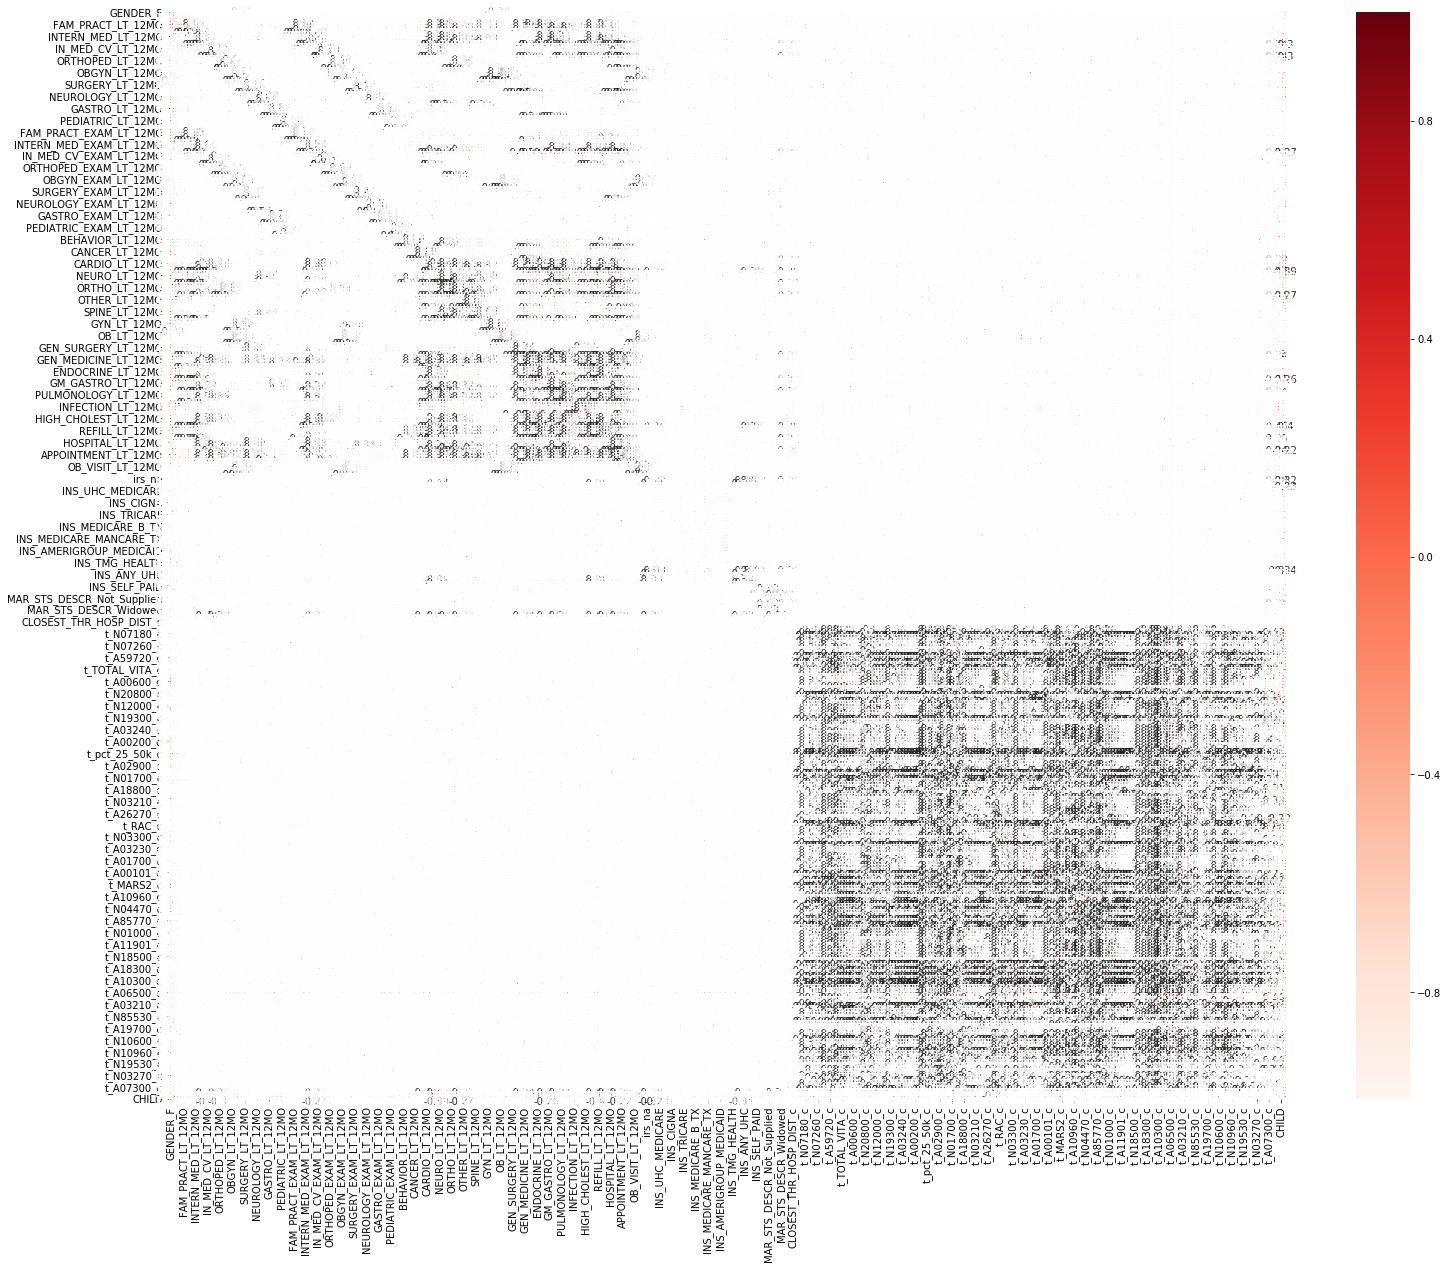

In [53]:
#Using Pearson Correlation
plt.figure(figsize=(25,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [88]:
#Correlation with output variable
cor_target = abs(cor["VIRTUALVISIT"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.076]
relevant_features

COVID                   0.179439
VIRTUALVISIT            1.000000
FAM_PRACT_LT_12MO       0.152652
FAM_PRACT_LT_24MO       0.152806
FAM_PRACT_LT_60MO       0.134538
FAM_PRACT_LAST          0.111671
FAM_PRACT_EXAM_LAST     0.086877
BEHAVIOR_LT_12MO        0.156792
BEHAVIOR_LT_24MO        0.159575
BEHAVIOR_LT_60MO        0.150142
BEHAVIOR_LAST           0.131947
NEURO_LAST              0.094989
SPINE_LAST              0.077549
GEN_SURGERY_LAST        0.091400
GEN_MEDICINE_LT_12MO    0.124801
GEN_MEDICINE_LT_24MO    0.127040
GEN_MEDICINE_LT_60MO    0.110339
GEN_MEDICINE_LAST       0.117704
ENDOCRINE_LAST          0.082556
GM_GASTRO_LAST          0.082531
PULMONOLOGY_LT_24MO     0.080909
HIGH_CHOLEST_LT_24MO    0.082264
REFILL_LT_12MO          0.131479
REFILL_LT_24MO          0.134964
REFILL_LT_60MO          0.121619
REFILL_LAST             0.161258
APPOINTMENT_LAST        0.101436
INS_UHC_MEDICARE        0.122112
INS_ANY_UHC             0.091868
INS_MEDICARE_ADV        0.101995
Name: VIRT

In [89]:
relevant_features.count()

30

In [93]:
features = relevant_features.index.tolist()

In [94]:
features

['COVID',
 'VIRTUALVISIT',
 'FAM_PRACT_LT_12MO',
 'FAM_PRACT_LT_24MO',
 'FAM_PRACT_LT_60MO',
 'FAM_PRACT_LAST',
 'FAM_PRACT_EXAM_LAST',
 'BEHAVIOR_LT_12MO',
 'BEHAVIOR_LT_24MO',
 'BEHAVIOR_LT_60MO',
 'BEHAVIOR_LAST',
 'NEURO_LAST',
 'SPINE_LAST',
 'GEN_SURGERY_LAST',
 'GEN_MEDICINE_LT_12MO',
 'GEN_MEDICINE_LT_24MO',
 'GEN_MEDICINE_LT_60MO',
 'GEN_MEDICINE_LAST',
 'ENDOCRINE_LAST',
 'GM_GASTRO_LAST',
 'PULMONOLOGY_LT_24MO',
 'HIGH_CHOLEST_LT_24MO',
 'REFILL_LT_12MO',
 'REFILL_LT_24MO',
 'REFILL_LT_60MO',
 'REFILL_LAST',
 'APPOINTMENT_LAST',
 'INS_UHC_MEDICARE',
 'INS_ANY_UHC',
 'INS_MEDICARE_ADV']

In [132]:
df_features=df[['COVID',
 'VIRTUALVISIT',
 'FAM_PRACT_LT_12MO',
 'FAM_PRACT_LT_24MO',
 'FAM_PRACT_LT_60MO',
 'FAM_PRACT_LAST',
 'FAM_PRACT_EXAM_LAST',
 'BEHAVIOR_LT_12MO',
 'BEHAVIOR_LT_24MO',
 'BEHAVIOR_LT_60MO',
 'BEHAVIOR_LAST',
 'NEURO_LAST',
 'SPINE_LAST',
 'GEN_SURGERY_LAST',
 'GEN_MEDICINE_LT_12MO',
 'GEN_MEDICINE_LT_24MO',
 'GEN_MEDICINE_LT_60MO',
 'GEN_MEDICINE_LAST',
 'ENDOCRINE_LAST',
 'GM_GASTRO_LAST',
 'PULMONOLOGY_LT_24MO',
 'HIGH_CHOLEST_LT_24MO',
 'REFILL_LT_12MO',
 'REFILL_LT_24MO',
 'REFILL_LT_60MO',
 'REFILL_LAST',
 'APPOINTMENT_LAST',
 'INS_UHC_MEDICARE',
 'INS_ANY_UHC',
 'INS_MEDICARE_ADV']]

In [134]:
df_features

,COVID,VIRTUALVISIT,FAM_PRACT_LT_12MO,FAM_PRACT_LT_24MO,FAM_PRACT_LT_60MO,FAM_PRACT_LAST,FAM_PRACT_EXAM_LAST,BEHAVIOR_LT_12MO,BEHAVIOR_LT_24MO,BEHAVIOR_LT_60MO,...,PULMONOLOGY_LT_24MO,HIGH_CHOLEST_LT_24MO,REFILL_LT_12MO,REFILL_LT_24MO,REFILL_LT_60MO,REFILL_LAST,APPOINTMENT_LAST,INS_UHC_MEDICARE,INS_ANY_UHC,INS_MEDICARE_ADV
0,0,0,0,0,0,72,72,0,0,0,...,2,0,0,0,0,72,2,0,0,0
1,1,0,9,15,24,2,3,1,2,2,...,1,1,4,5,5,2,2,0,0,0
2,0,0,0,0,0,72,72,0,0,0,...,0,0,0,0,0,72,3,0,0,0
3,1,0,2,10,12,10,16,0,2,2,...,1,0,1,1,1,10,11,0,1,0
4,0,0,13,27,69,4,12,0,0,0,...,0,18,4,8,20,5,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634,0,1,14,29,37,4,72,2,2,2,...,2,5,3,3,3,5,6,0,0,0
9635,0,1,19,32,32,2,72,6,10,10,...,4,2,3,8,8,2,3,0,0,1
9636,0,0,0,0,0,72,72,1,1,1,...,0,3,0,0,0,72,3,0,0,0
9637,1,1,7,10,10,5,72,0,1,2,...,0,0,4,8,8,5,3,0,0,0


In [348]:
X=df_features.drop(['VIRTUALVISIT'],axis=1)
y=df_features['VIRTUALVISIT']

In [349]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=102)

In [350]:
oversampler=SMOTE(random_state=97)
X_train_oversample,y_train_oversample=oversampler.fit_sample(X_train,y_train)

In [351]:
rfc = RandomForestClassifier(n_estimators=50).fit(X_train_oversample,y_train_oversample)

In [352]:
y_pred_new = rfc.predict(X_test)

In [353]:
train_accuracy = accuracy_score(y_train_oversample, rfc.predict(X_train_oversample))
test_accuracy = accuracy_score(y_test, y_pred_new)
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:',test_accuracy)

Train Accuracy: 0.9941148995796357
Test Accuracy: 0.7013370376801528


In [354]:
#doing balancing from sklearn.utils import resample

y_new = df_features['VIRTUALVISIT']
X_new= df_features.drop(['VIRTUALVISIT'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,train_size=0.75,random_state=50)

X=pd.concat([X_train,y_train],axis=1)

In [355]:
# unsampling the minority by adding dummy rows to the left equal to 1 
from sklearn.utils import resample

left_upsampled= resample(X[X.VIRTUALVISIT==1],replace=True,n_samples=len(X[X.VIRTUALVISIT==0]),random_state=50)

left_upsampled=pd.concat([X[X.VIRTUALVISIT==0],left_upsampled])

In [356]:
left_upsampled.VIRTUALVISIT.value_counts()

1    11476
0    11476
Name: VIRTUALVISIT, dtype: int64

In [357]:
# Preparing for X train and Y train dataset

y_train=left_upsampled.VIRTUALVISIT
X_train=left_upsampled.drop(['VIRTUALVISIT'],axis=1)

In [358]:
rfc_upsample = RandomForestClassifier(n_estimators=20,random_state = 14)
rfc_upsample.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=14)

In [359]:
y_pred_final = rfc_upsample.predict(X_test)

In [360]:
train_accuracy = accuracy_score(y_train, rfc_upsample.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_final)
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:',test_accuracy)

Train Accuracy: 0.9945974207040781
Test Accuracy: 0.7795374036257554


In [361]:
#for train
confusion_matrix(y_train, rfc_upsample.predict(X_train))

array([[11459,    17],
       [  107, 11369]], dtype=int64)

In [362]:
#for test
confusion_matrix(y_test, y_pred_final)

array([[3563,  265],
       [ 793,  178]], dtype=int64)

In [363]:
from sklearn.metrics import roc_curve, auc
#test
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_final)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.557044709318405


Text(0.5, 0, 'False Positive Rate')

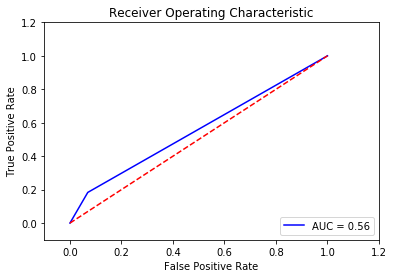

In [364]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [366]:
#train
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, rfc_upsample.predict(X_train))
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.994597420704078


Text(0.5, 0, 'False Positive Rate')

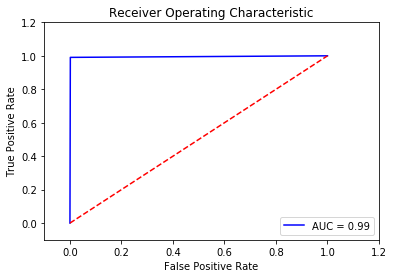

In [367]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [434]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [435]:
logisticRegr = LogisticRegression(random_state=101)
rfe = RFE(logisticRegr, 30)

In [436]:
# X_rfe = rfe.fit_transform(X_train_oversample,y_train_oversample)  

In [437]:
rfe.fit(X_train_oversample,y_train_oversample)

RFE(estimator=LogisticRegression(random_state=101), n_features_to_select=30)

In [438]:
y_pred_final = rfe.predict(X_test)

In [439]:
train_accuracy = accuracy_score(y_train_oversample, rfe.predict(X_train_oversample))
test_accuracy = accuracy_score(y_test, y_pred_final)
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:',test_accuracy)

Train Accuracy: 0.6378327884166277
Test Accuracy: 0.6149197749531152


In [440]:
#so the best is resample blaancing training 100% testing 80% 

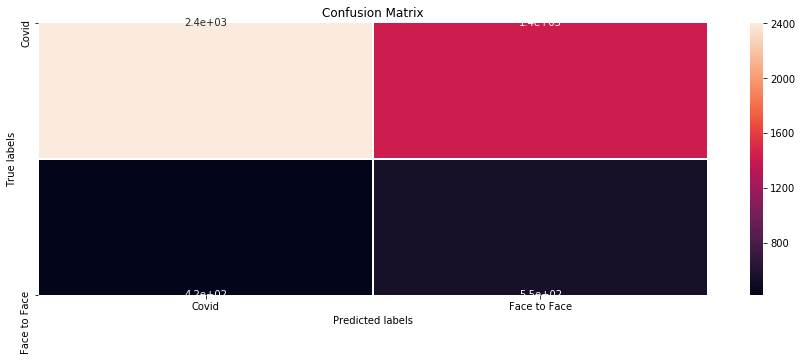

In [441]:
import seaborn as sns
import matplotlib.pyplot as plt 
cm=confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(15,5))
ax= plt.subplot(111)
sns.heatmap(cm, annot=True, linewidths=.5, ax = ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Face to Face']); ax.yaxis.set_ticklabels(['Covid', 'Face to Face']);

In [453]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.85      0.63      0.72      3828
           1       0.28      0.56      0.37       971

    accuracy                           0.61      4799
   macro avg       0.56      0.60      0.55      4799
weighted avg       0.73      0.61      0.65      4799



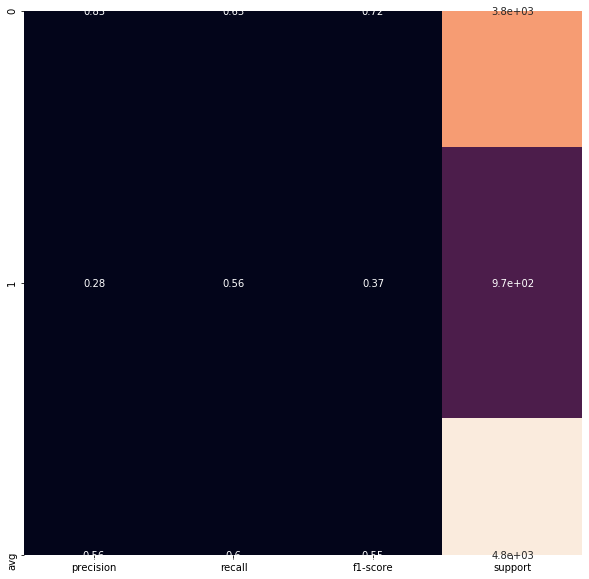

In [457]:
from sklearn.metrics import precision_recall_fscore_support
def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

plot_classification_report(y_test, y_pred_final)

In [415]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_final)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.59605478952313


Text(0.5, 0, 'False Positive Rate')

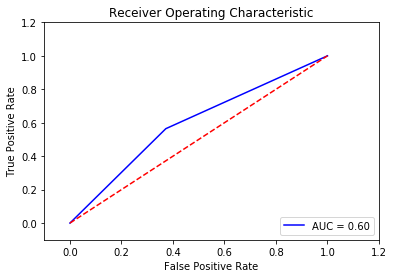

In [416]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [458]:
#for validation set
df_valid = pd.read_excel('validation_set.xlsx') 
df_valid

,VERATO_IDN_NUM,GENDER_F,DECEMBER,COVID,VIRTUALVISIT,FAM_PRACT_LT_12MO,FAM_PRACT_LT_24MO,FAM_PRACT_LT_60MO,FAM_PRACT_LAST,INTERN_MED_LT_12MO,...,t_N03270_c,t_N07100_c,t_N11560_c,t_N03220_c,t_A07300_c,t_PREP_c,AGE_SQ,THR_hosp_closer,CHILD,SENIOR
0,5d492db73c06bd7207d2365b,1,0,0,1,0,0,0,72,1,...,0.034241,0.335382,0.011414,0.034241,0.126778,0.443371,4096,1,0,0
1,5d4966d5316da173d612d5de,1,0,0,0,6,10,14,4,0,...,0.013174,0.320958,0.011976,0.025150,0.004671,0.470659,1089,1,0,0
2,5d48ed2e96932872619a7da0,0,0,0,0,12,27,66,3,0,...,0.007838,0.318489,0.013894,0.022444,0.000748,0.502672,2116,0,0,0
3,5d495bede3d917736380d726,1,0,0,1,0,0,3,28,0,...,0.019727,0.301973,0.012140,0.025038,0.016768,0.455994,3721,1,0,0
4,5d496417ceac77738ac26214,1,0,0,0,3,4,7,3,0,...,0.023669,0.293886,0.011834,0.029586,0.013215,0.495069,2304,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,5e19bf65f1b2c0228acf0214,1,0,1,0,0,0,0,72,0,...,0.023506,0.320349,0.010745,0.007388,0.358831,0.632639,4096,0,0,0
9682,5d49284d9af2447252664f1e,0,0,0,0,0,0,1,56,0,...,0.017361,0.396701,0.010851,0.050347,0.002951,0.443142,3600,0,0,0
9683,5d4940e4e709797251fd4979,1,0,0,0,0,0,2,24,0,...,0.009845,0.292546,0.011252,0.014065,0.001266,0.469761,6724,0,0,1
9684,5d4954556ea7007246d8dc02,1,0,0,1,12,26,33,2,0,...,0.048032,0.290861,0.012008,0.024016,0.235757,0.519013,2304,1,0,0


In [459]:
df_valid_new=df_valid[['COVID',
 'FAM_PRACT_LT_12MO',
 'FAM_PRACT_LT_24MO',
 'FAM_PRACT_LT_60MO',
 'FAM_PRACT_LAST',
 'FAM_PRACT_EXAM_LAST',
 'BEHAVIOR_LT_12MO',
 'BEHAVIOR_LT_24MO',
 'BEHAVIOR_LT_60MO',
 'BEHAVIOR_LAST',
 'NEURO_LAST',
 'SPINE_LAST',
 'GEN_SURGERY_LAST',
 'GEN_MEDICINE_LT_12MO',
 'GEN_MEDICINE_LT_24MO',
 'GEN_MEDICINE_LT_60MO',
 'GEN_MEDICINE_LAST',
 'ENDOCRINE_LAST',
 'GM_GASTRO_LAST',
 'PULMONOLOGY_LT_24MO',
 'HIGH_CHOLEST_LT_24MO',
 'REFILL_LT_12MO',
 'REFILL_LT_24MO',
 'REFILL_LT_60MO',
 'REFILL_LAST',
 'APPOINTMENT_LAST',
 'INS_UHC_MEDICARE',
 'INS_ANY_UHC',
 'INS_MEDICARE_ADV']]

In [481]:
valid_pred_final = rfe.predict(df_valid_new)

In [482]:
valid_pred_final

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [483]:
result = pd.DataFrame(valid_pred_final)
result = result.rename(columns={0: 'virtualvisit prediction'})
result

,virtualvisit prediction
0,0
1,1
2,1
3,0
4,1
...,...
9681,0
9682,0
9683,0
9684,1


In [484]:
probs = rfe.predict_proba(df_valid_new)

In [485]:
probs

array([[0.69354665, 0.30645335],
       [0.36799436, 0.63200564],
       [0.43406134, 0.56593866],
       ...,
       [0.53195847, 0.46804153],
       [0.19852621, 0.80147379],
       [0.69744879, 0.30255121]])

In [486]:
result_1 = pd.DataFrame(probs)
result_1=result_1.rename(columns={0: 'virtualvisit_prob' , 1 : 'inpersonvisit_prob'})
result_1

,virtualvisit_prob,inpersonvisit_prob
0,0.693547,0.306453
1,0.367994,0.632006
2,0.434061,0.565939
3,0.764064,0.235936
4,0.443546,0.556454
...,...,...
9681,0.661376,0.338624
9682,0.828517,0.171483
9683,0.531958,0.468042
9684,0.198526,0.801474


In [496]:
result_final = pd.concat([result, result_1], ignore_index=True, axis=1)
result_final = result_final.rename(columns={0: 'virtualvisit prediction' , 1 : 'virtualvisit_prob', 2 : 'inpersonvisit_prob'})
result_final

,virtualvisit prediction,virtualvisit_prob,inpersonvisit_prob
0,0,0.693547,0.306453
1,1,0.367994,0.632006
2,1,0.434061,0.565939
3,0,0.764064,0.235936
4,1,0.443546,0.556454
...,...,...,...
9681,0,0.661376,0.338624
9682,0,0.828517,0.171483
9683,0,0.531958,0.468042
9684,1,0.198526,0.801474


In [499]:
validation_set= pd.concat([df_valid, result_final], axis=1)

In [501]:
validation_set.to_csv('validation.csv')

In [502]:
femi_test = pd.read_csv('validation.csv')
femi_test.head(100)

,Unnamed: 0,VERATO_IDN_NUM,GENDER_F,DECEMBER,COVID,VIRTUALVISIT,FAM_PRACT_LT_12MO,FAM_PRACT_LT_24MO,FAM_PRACT_LT_60MO,FAM_PRACT_LAST,...,t_N03220_c,t_A07300_c,t_PREP_c,AGE_SQ,THR_hosp_closer,CHILD,SENIOR,virtualvisit prediction,virtualvisit_prob,inpersonvisit_prob
0,0,5d492db73c06bd7207d2365b,1,0,0,1,0,0,0,72,...,0.034241,0.126778,0.443371,4096,1,0,0,0,0.693547,0.306453
1,1,5d4966d5316da173d612d5de,1,0,0,0,6,10,14,4,...,0.025150,0.004671,0.470659,1089,1,0,0,1,0.367994,0.632006
2,2,5d48ed2e96932872619a7da0,0,0,0,0,12,27,66,3,...,0.022444,0.000748,0.502672,2116,0,0,0,1,0.434061,0.565939
3,3,5d495bede3d917736380d726,1,0,0,1,0,0,3,28,...,0.025038,0.016768,0.455994,3721,1,0,0,0,0.764064,0.235936
4,4,5d496417ceac77738ac26214,1,0,0,0,3,4,7,3,...,0.029586,0.013215,0.495069,2304,1,0,0,1,0.443546,0.556454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,5d48ea409af244725262ff0a,1,0,0,0,0,0,0,72,...,0.036879,0.018511,0.418440,3844,1,0,0,0,0.829212,0.170788
96,96,5d493c85e709797251fd2447,0,0,0,0,4,4,4,2,...,0.018116,0.001656,0.549172,6561,0,0,1,0,0.594940,0.405060
97,97,5d49404a7f0a5872581c5142,0,0,0,0,1,4,4,2,...,0.043038,0.110970,0.470886,1849,1,0,0,0,0.686797,0.313203
98,98,5dbb3f1f0659882329c12da6,0,0,0,0,0,0,0,72,...,0.031343,0.102687,0.426368,1444,1,0,0,0,0.674086,0.325914
